### Import libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

from pyramid.arima import auto_arima

### Read data

In [2]:
df = pd.read_csv("data-wrss9.csv", parse_dates=["Date"], index_col=0)

### Rename columns

In [3]:
df.columns

Index(['Total confirmed cases', 'Total deaths', 'Total recovered'], dtype='object')

In [4]:
df.rename(columns={'Total confirmed cases':'TotalConfirmedCases',
                   'Total deaths':'TotalDeaths',
                   'Total recovered':'TotalRecovered'
                  }, 
          inplace=True
         )

### Data Analysis

In [5]:
df.head()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Jan 23,555,0,0
Jan 24,653,18,30
Jan 25,941,26,36
Jan 26,2019,56,49
Jan 27,2794,80,54


In [6]:
df.tail()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Mar 10,115113,4063,64384
Mar 11,121312,4363,66519
Mar 12,126726,4629,67995
Mar 13,138459,5103,70494
Mar 14,145480,5426,72165


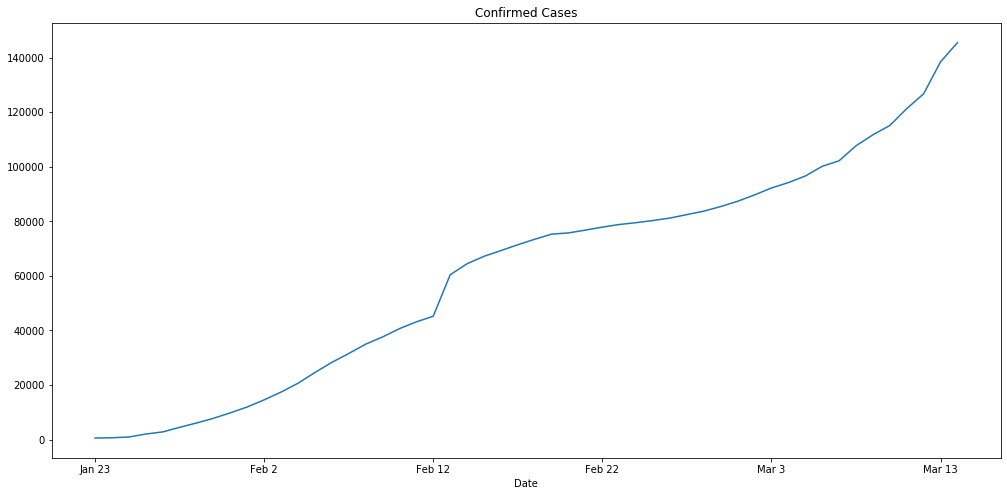

In [7]:
df.TotalConfirmedCases.plot(title="Confirmed Cases", figsize=(17, 8))

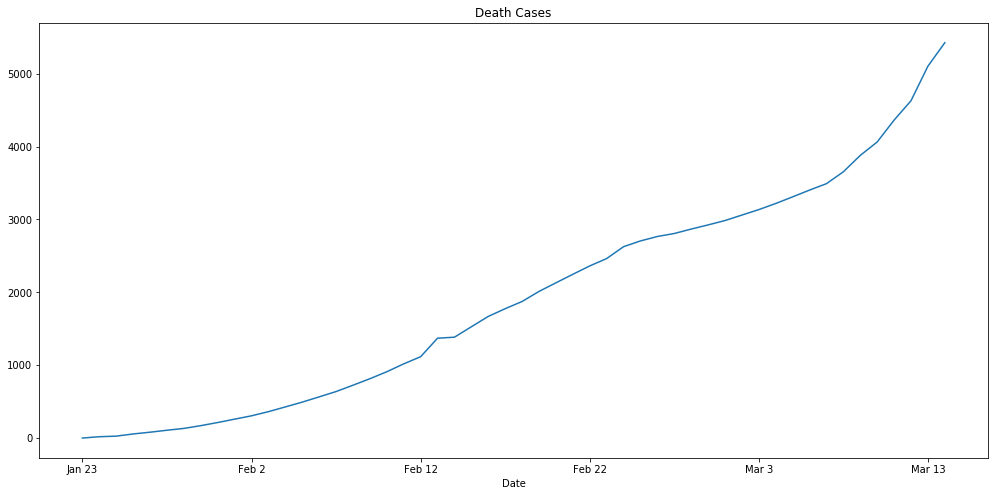

In [8]:
df.TotalDeaths.plot(title="Death Cases", figsize=(17, 8))

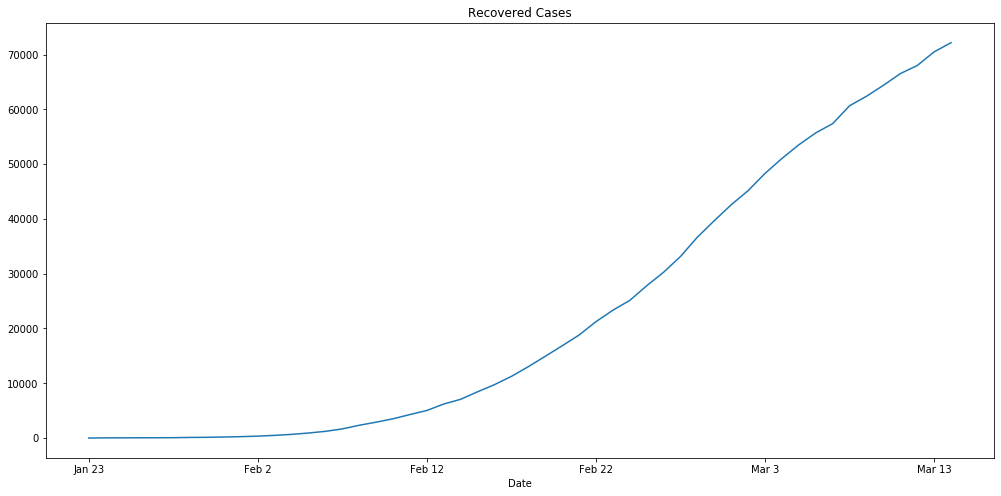

In [9]:
df.TotalRecovered.plot(title="Recovered Cases", figsize=(17, 8))

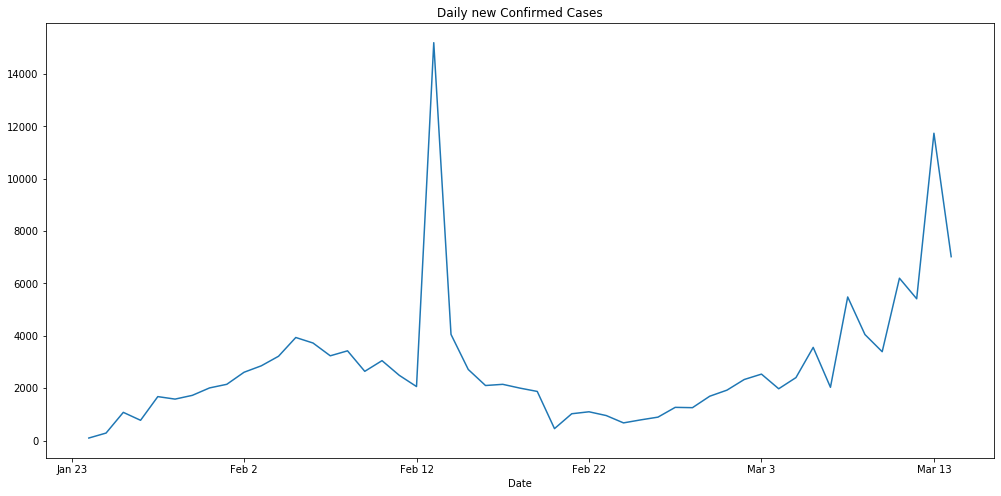

In [10]:
(df.TotalConfirmedCases - df.TotalConfirmedCases.shift(1)).plot(title="Daily new Confirmed Cases", figsize=(17, 8))

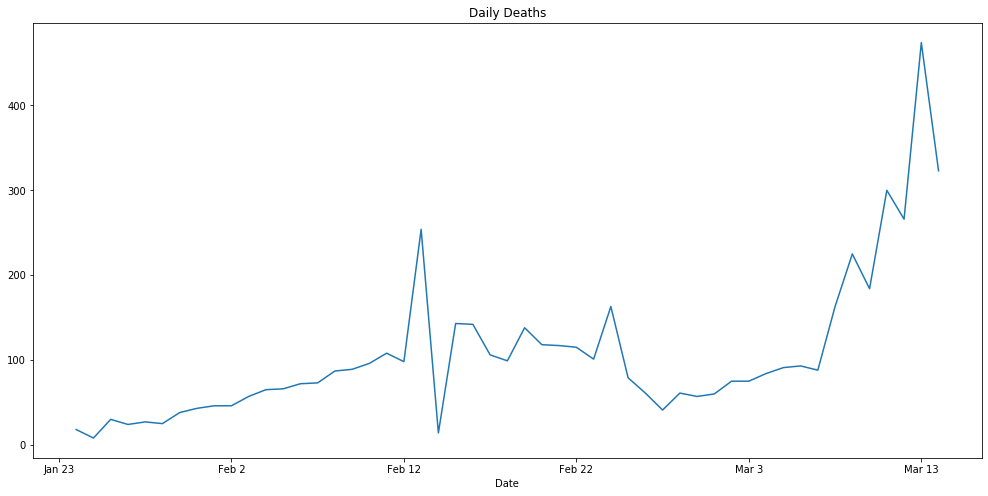

In [11]:
(df.TotalDeaths - df.TotalDeaths.shift(1)).plot(title="Daily Deaths", figsize=(17, 8))

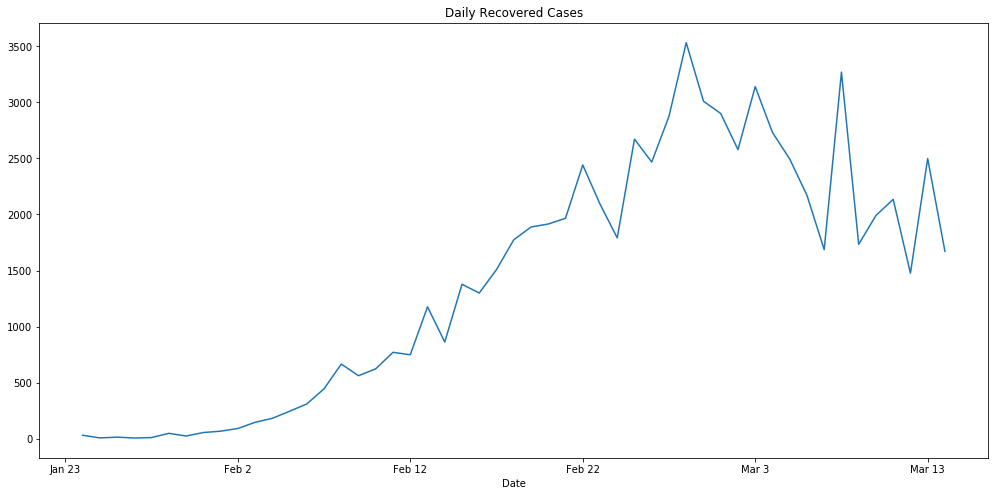

In [12]:
(df.TotalRecovered - df.TotalRecovered.shift(1)).plot(title="Daily Recovered Cases", figsize=(17, 8))

### Constants for predictions

In [13]:
predicted_days = 15
firstPredictionDay = datetime.datetime.strptime(df.index[-1] + ' 2020','%b %d %Y') + datetime.timedelta(days = 1)

### Arima for confirmed cases

In [14]:
confirmed_model = auto_arima(df.TotalConfirmedCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=951.246, BIC=955.109, Fit time=0.028 seconds
Fit ARIMA: order=(1, 1, 0); AIC=943.979, BIC=949.775, Fit time=0.799 seconds
Fit ARIMA: order=(0, 1, 1); AIC=946.744, BIC=952.539, Fit time=0.869 seconds
Fit ARIMA: order=(2, 1, 0); AIC=943.515, BIC=951.243, Fit time=1.093 seconds
Fit ARIMA: order=(2, 1, 1); AIC=944.767, BIC=954.426, Fit time=0.976 seconds
Fit ARIMA: order=(3, 1, 1); AIC=946.754, BIC=958.345, Fit time=1.605 seconds
Fit ARIMA: order=(3, 1, 0); AIC=944.924, BIC=954.583, Fit time=0.914 seconds
Total fit time: 7.960 seconds


In [15]:
confirmed_model.aic()

943.5154580485371

In [16]:
confirmed_model.fit(df.TotalConfirmedCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [17]:
new_cases_forecast = confirmed_model.predict(n_periods=predicted_days)

In [18]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(new_cases_forecast[x])))

2020-03-15 - 151997
2020-03-16 - 157176
2020-03-17 - 161772
2020-03-18 - 165836
2020-03-19 - 169574
2020-03-20 - 173069
2020-03-21 - 176400
2020-03-22 - 179615
2020-03-23 - 182749
2020-03-24 - 185826
2020-03-25 - 188864
2020-03-26 - 191875
2020-03-27 - 194867
2020-03-28 - 197845
2020-03-29 - 200814


### Arima for death cases

In [19]:
deaths_model = auto_arima(df.TotalDeaths,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=536.546, BIC=548.018, Fit time=0.685 seconds
Fit ARIMA: order=(0, 2, 0); AIC=562.073, BIC=565.897, Fit time=0.013 seconds
Fit ARIMA: order=(1, 2, 0); AIC=538.050, BIC=543.786, Fit time=0.138 seconds
Fit ARIMA: order=(0, 2, 1); AIC=545.432, BIC=551.168, Fit time=0.181 seconds
Fit ARIMA: order=(1, 2, 2); AIC=535.227, BIC=544.787, Fit time=0.628 seconds
Fit ARIMA: order=(1, 2, 1); AIC=539.764, BIC=547.412, Fit time=0.348 seconds
Fit ARIMA: order=(1, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 3); AIC=538.220, BIC=551.605, Fit time=1.340 seconds
Fit ARIMA: order=(0, 2, 2); AIC=534.014, BIC=541.662, Fit time=0.309 seconds
Fit ARIMA: order=(0, 2, 3); AIC=535.585, BIC=545.145, Fit time=0.453 seconds
Total fit time: 4.182 seconds


In [20]:
deaths_model.aic()

534.0136525100943

In [21]:
deaths_model.fit(df.TotalDeaths)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [22]:
death_forecast = deaths_model.predict(n_periods=predicted_days)

In [23]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(death_forecast[x])))

2020-03-15 - 5866
2020-03-16 - 6307
2020-03-17 - 6755
2020-03-18 - 7212
2020-03-19 - 7678
2020-03-20 - 8151
2020-03-21 - 8632
2020-03-22 - 9122
2020-03-23 - 9620
2020-03-24 - 10126
2020-03-25 - 10640
2020-03-26 - 11162
2020-03-27 - 11693
2020-03-28 - 12231
2020-03-29 - 12778


### Arima for recovered cases

In [24]:
recovered_model = auto_arima(df.TotalRecovered,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=743.774, BIC=755.246, Fit time=1.435 seconds
Fit ARIMA: order=(0, 2, 0); AIC=760.943, BIC=764.767, Fit time=0.025 seconds
Fit ARIMA: order=(1, 2, 0); AIC=743.029, BIC=748.765, Fit time=0.408 seconds
Fit ARIMA: order=(0, 2, 1); AIC=744.701, BIC=750.437, Fit time=0.322 seconds
Fit ARIMA: order=(2, 2, 0); AIC=741.155, BIC=748.803, Fit time=0.367 seconds
Fit ARIMA: order=(2, 2, 1); AIC=734.518, BIC=744.078, Fit time=0.853 seconds
Fit ARIMA: order=(3, 2, 2); AIC=738.130, BIC=751.514, Fit time=1.219 seconds
Fit ARIMA: order=(1, 2, 1); AIC=742.681, BIC=750.329, Fit time=0.560 seconds
Fit ARIMA: order=(3, 2, 1); AIC=743.472, BIC=754.944, Fit time=1.147 seconds
Total fit time: 6.371 seconds


In [25]:
recovered_model.aic()

734.5183521130814

In [26]:
recovered_model.fit(df.TotalRecovered)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [27]:
recovered_forecast = recovered_model.predict(n_periods=predicted_days)

In [28]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(recovered_forecast[x])))

2020-03-15 - 74345
2020-03-16 - 76505
2020-03-17 - 78465
2020-03-18 - 80849
2020-03-19 - 82896
2020-03-20 - 85250
2020-03-21 - 87529
2020-03-22 - 89826
2020-03-23 - 92275
2020-03-24 - 94621
2020-03-25 - 97132
2020-03-26 - 99606
2020-03-27 - 102143
2020-03-28 - 104742
2020-03-29 - 107335
